In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('marital status.csv')
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [3]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [4]:
handle=df['status'].median()
handle

np.float64(0.0)

In [5]:
df.status=df.status.fillna(handle)
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [6]:
df['status'].value_counts()

status
0.0    11
1.0     9
Name: count, dtype: int64

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x
y

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1.])

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=1/3,random_state=1)


In [9]:
from sklearn.linear_model import LogisticRegression
regressor =LogisticRegression()
regressor.fit(xtrain,ytrain)

LogisticRegression()

In [10]:
y_pred=regressor.predict(xtest)

In [11]:
df['y_pred']=regressor.predict(x)
df.head()

,age,status,y_pred
0,21,0.0,0.0
1,33,1.0,1.0
2,24,0.0,0.0
3,28,1.0,1.0
4,17,0.0,0.0


In [12]:
regressor.score(x,y)

0.8

In [13]:
regressor.predict_proba(xtest)

array([[0.28823441, 0.71176559],
       [0.98955812, 0.01044188],
       [0.79723672, 0.20276328],
       [0.50131505, 0.49868495],
       [0.71391911, 0.28608089],
       [0.02578902, 0.97421098],
       [0.98364637, 0.01635363]])

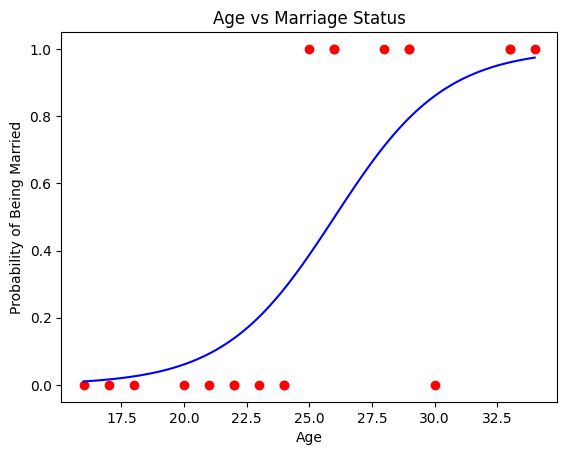

In [14]:
ages = np.linspace(x[:, 0].min(), x[:, 0].max(), 100).reshape(-1, 1)

y_curve = regressor.predict_proba(ages)[:, -1]  

plt.scatter(x[:, 0], y, color='red')  
plt.plot(ages, y_curve, color='blue')
plt.title('Age vs Marriage Status')
plt.xlabel('Age')
plt.ylabel('Probability of Being Married')
plt.show()
